In [1]:
from scipy.io import loadmat
import numpy as np
import mat73
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
file = 'data/ts_all_ADNI_subjects_all_DiCER_100_yeo7_S1.mat'

In [3]:
data_dict = mat73.loadmat(file)
data_dict.keys()

dict_keys(['subjectList', 'ts_all'])

In [4]:
data = data_dict['ts_all']
len(data)

154

In [5]:
subjects = data_dict['subjectList']
print(len(subjects['name']))

154


In [6]:
for idx, s in enumerate(data):
    if s.shape[0] != 972:
        print(idx, s.shape, subjects['name'][idx])
    nans = np.isnan(s).sum()
    if nans !=0:
        print(nans)

40 (947, 116) 023_S_0031


In [7]:
fcs = np.empty((154,116,116))
for idx, s in enumerate(data):
    corr = np.corrcoef(s.T)
    fcs[idx,:,:] = corr
print(f'FCs: {fcs.shape}')

FCs: (154, 116, 116)


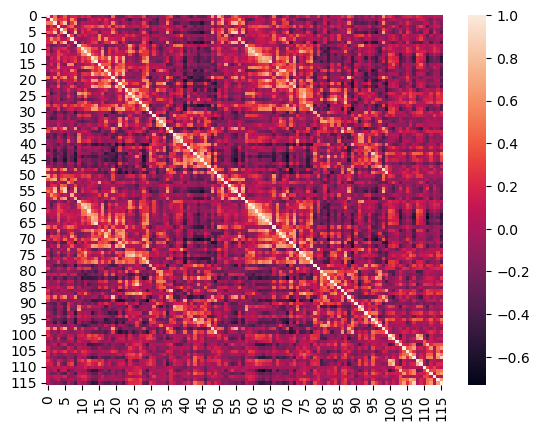

In [8]:
plt.figure()
sns.heatmap(fcs[0])
plt.show()

In [9]:
column_names = ['id', 'class', 'sex', 'age']
df = pd.read_csv('data/adni_demographics_154Subjs.csv', header=None, names=column_names)
print(df.shape)
df['image_id'] = subjects['name']
df['id'] = df['id'].str.replace('["\']', '', regex=True)
df['class'] = df['class'].str.replace('["\']', '', regex=True)
df['sex'] = df['sex'].str.replace('["\']', '', regex=True)
df.head(20)

(154, 4)


,id,class,sex,age,image_id
0,002_S_0413,CN,F,90,002_S_0413
1,002_S_1155,MCI,M,70,002_S_1155
2,002_S_1261,CN,F,83,002_S_1261
3,002_S_1280,CN,F,83,002_S_1280
4,002_S_4213,CN,F,86,002_S_4213
5,002_S_4229,LMCI,M,75,002_S_4229
6,002_S_4654,LMCI,F,83,002_S_4654
7,002_S_4799,EMCI,M,75,002_S_4799
8,002_S_5178,SMC,M,75,002_S_5178
9,002_S_5230,SMC,F,80,002_S_5230


In [10]:
(df['image_id'] == df['id']).sum()

154

In [11]:
subjects['name'][40]

'023_S_0031'

In [12]:
Counter(df['class'])

Counter({'CN': 80, 'MCI': 38, 'EMCI': 15, 'LMCI': 7, 'SMC': 7, 'AD': 7})

In [13]:
df = df[df['image_id'] != '023_S_0031'] # BECAUSE OF NOT COMPLETE DATA IT WAS EXCLUDED
df.reset_index(inplace=True)
df.shape

(153, 6)

In [14]:
cn_index = df.index[df['class'] == 'CN'].values
cn_index.shape, cn_index

((79,),
 array([  0,   2,   3,   4,  10,  11,  12,  14,  17,  20,  21,  22,  23,
         25,  26,  27,  28,  31,  32,  33,  34,  36,  37,  40,  43,  47,
         48,  49,  51,  53,  55,  57,  59,  60,  61,  62,  65,  74,  75,
         76,  80,  89,  92,  93, 100, 101, 102, 103, 104, 107, 109, 110,
        113, 115, 119, 121, 123, 124, 125, 129, 130, 132, 133, 134, 135,
        137, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150,
        151]))

In [15]:
print(df.filter(items=cn_index, axis=0).shape)
df.filter(items=cn_index, axis=0).head(30)

(79, 6)


,index,id,class,sex,age,image_id
0,0,002_S_0413,CN,F,90,002_S_0413
2,2,002_S_1261,CN,F,83,002_S_1261
3,3,002_S_1280,CN,F,83,002_S_1280
4,4,002_S_4213,CN,F,86,002_S_4213
10,10,002_S_6009,CN,M,70,002_S_6009
11,11,002_S_6053,CN,M,68,002_S_6053
12,12,002_S_6066,CN,F,71,002_S_6066
14,14,002_S_6680,CN,M,64,002_S_6680
17,17,007_S_1222,CN,F,84,007_S_1222
20,20,007_S_4387,CN,F,82,007_S_4387


In [16]:
ad_index = df.index[(df['class'] != 'CN') & (df['class'] != 'SMC')].values
ad_index.shape, ad_index

((67,),
 array([  1,   5,   6,   7,  13,  15,  16,  18,  19,  29,  30,  35,  38,
         39,  41,  42,  44,  45,  46,  50,  52,  54,  56,  58,  63,  64,
         66,  67,  68,  71,  72,  73,  77,  78,  79,  81,  82,  83,  84,
         85,  86,  87,  88,  90,  91,  94,  95,  96,  97,  98,  99, 105,
        106, 108, 111, 112, 114, 116, 117, 118, 120, 122, 128, 131, 136,
        138, 152]))

In [30]:
print(df.filter(items=ad_index, axis=0).shape)
df.filter(items=ad_index, axis=0).reset_index().tail(25)

(67, 6)


,level_0,index,id,class,sex,age,image_id
42,88,89,052_S_6305,AD,M,69,052_S_6305
43,90,91,052_S_6832,MCI,M,79,052_S_6832
44,91,92,052_S_6844,MCI,F,76,052_S_6844
45,94,95,067_S_2301,EMCI,M,72,067_S_2301
46,95,96,067_S_2304,EMCI,M,68,067_S_2304
47,96,97,067_S_4072,EMCI,F,69,067_S_4072
48,97,98,067_S_4184,EMCI,F,69,067_S_4184
49,98,99,067_S_4212,EMCI,M,71,067_S_4212
50,99,100,067_S_4767,LMCI,F,71,067_S_4767
51,105,106,067_S_6474,MCI,M,74,067_S_6474


In [18]:
data_filtered = [x for i, x in enumerate(data) if i != 40]
len(data_filtered)

153

In [19]:
adni_data = np.array(data_filtered)
adni_data.shape

(153, 972, 116)

In [20]:
cn_data = adni_data[cn_index,:,:]
cn_data.shape

(79, 972, 116)

In [21]:
ad_data = adni_data[ad_index,:,:]
ad_data.shape

(67, 972, 116)

In [116]:
np.save('data/cn_series_79_subjects.npy', cn_data)
np.save('data/ad_series_67_subjects.npy', ad_data)

In [22]:
print(df.filter(items=ad_index, axis=0).shape)
df.filter(items=ad_index, axis=0).head(30)

(67, 6)


,index,id,class,sex,age,image_id
1,1,002_S_1155,MCI,M,70,002_S_1155
5,5,002_S_4229,LMCI,M,75,002_S_4229
6,6,002_S_4654,LMCI,F,83,002_S_4654
7,7,002_S_4799,EMCI,M,75,002_S_4799
13,13,002_S_6652,MCI,F,86,002_S_6652
15,15,002_S_6695,MCI,M,66,002_S_6695
16,16,002_S_6864,MCI,F,68,002_S_6864
18,18,007_S_2394,EMCI,M,74,007_S_2394
19,19,007_S_4272,EMCI,M,77,007_S_4272
29,29,007_S_6341,MCI,M,67,007_S_6341
